<a href="https://colab.research.google.com/github/BenGravell/rbot101/blob/main/probability_theory/mixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Only need to run this once per Colab notebook
!git clone https://github.com/BenGravell/rbot101

Cloning into 'rbot101'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 77 (delta 39), reused 49 (delta 25), pack-reused 0
Unpacking objects: 100% (77/77), done.


In [2]:
import sys
sys.path.insert(0,'/content/rbot101')
sys.path.insert(0,'/content/rbot101/probability_theory')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utility import savefig, plt_reset

In [4]:
def gaussian_pdf(x, mean=0.0, std=1.0):
    return (1/(std*(2*np.pi)**0.5))*np.exp(-0.5*((x-mean)/std)**2)


def pulse(x, center=0.0, width=0.001):
    y = x - center
    return np.where(np.abs(y) < width/2, 1/width, 0)


def discrete_pdf(x, locs=None, weights=None):
    if locs is None:
        locs = [1.0, 0.0, -2.0]
    if weights is None:
        weights = [0.2, 0.5, 0.3]
    assert len(locs) == len(weights)
    return np.sum([weight*pulse(x-loc) for loc, weight in zip(locs, weights)], axis=0)

In [5]:
step = 0.0001
x = np.arange(-4, 4+step, step)
m = int((x.size-1)/2)
cont_pdf = gaussian_pdf(x)
disc_pdf = discrete_pdf(x)
mixd_pdf = np.concatenate([gaussian_pdf(x[0:m]), discrete_pdf(x[m:])])

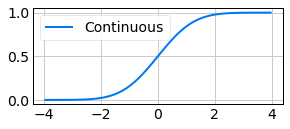

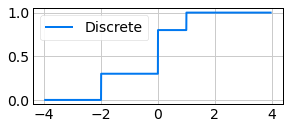

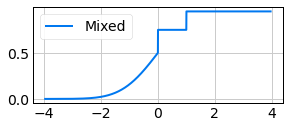

In [6]:
plt_reset()
figsize = (4.25, 2)
pdf_list = [cont_pdf, disc_pdf, mixd_pdf]
label_list = ['Continuous', 'Discrete', 'Mixed']
for pdf, label in zip(pdf_list, label_list):
    plt.figure(figsize=figsize)
    cdf = np.cumsum(pdf*np.diff(x, prepend=x[0]))
    plt.plot(x, cdf, label=label)
    plt.legend()
    plt.grid('on')
    plt.tight_layout()
    savefig('cdf_'+label.lower()+'.pdf')